<a href="https://colab.research.google.com/github/SiyuanChen726/BreastAgeNet/blob/main/vis_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/SiyuanChen726/BreastAgeNet.git

Cloning into 'BreastAgeNet'...
remote: Enumerating objects: 299, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 299 (delta 59), reused 2 (delta 1), pack-reused 172 (from 1)
Receiving objects: 100% (299/299), 26.85 MiB | 20.25 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [ ]:
!apt-get update
!apt-get install -y openslide-tools libopenslide0
!pip install openslide-python

In [ ]:
# Download the files with corrected Google Drive links
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1tDfFXZvB6PASPW-4OMrBU-HQo7optH53' -O 'BreastAgeNet_bestModel.pt'
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1Yu6_4yrlaUEPhe30fdoZwHmTcW7llJVK' -O 'SGK_UNI_BreastAgeNet.csv'

In [7]:
import os
import sys
sys.path.append('/content/BreastAgeNet')

import openslide
import h5py
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


from utils_vis import *
from utils_train import *

In [10]:
tsne_df = pd.read_csv("SGK_UNI_BreastAgeNet.csv")

embedding_columns = [col for col in tsne_df.columns if col.startswith('embedding_')]

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(tsne_df.loc[:, embedding_columns])

tsne_df["tsne1"] = -projections[:,0]
tsne_df["tsne2"] = -projections[:,1]

In [11]:
n_clusters = 4  # Adjust this as necessary
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
tsne_df['Cluster'] = kmeans.fit_predict(tsne_df.loc[:, embedding_columns].copy())

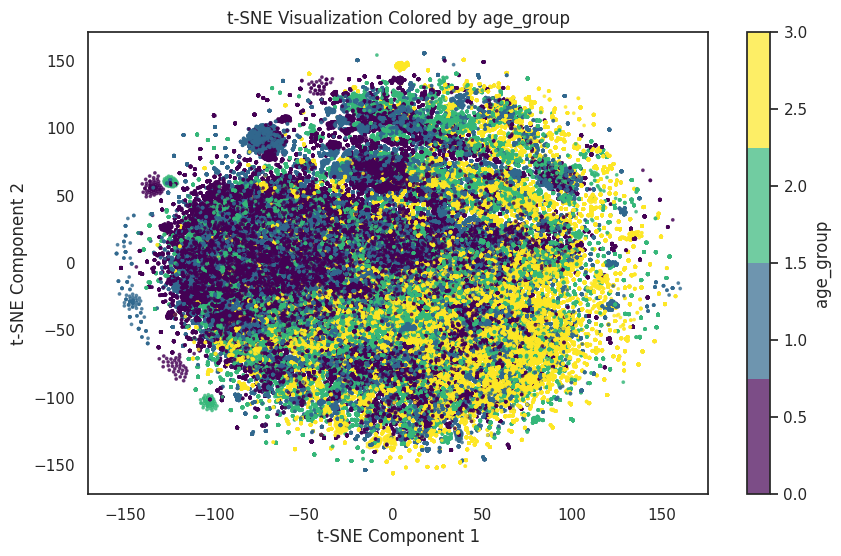

In [38]:
plot_tsne(tsne_df, color='age_group', point_size=3, save_pt=None)

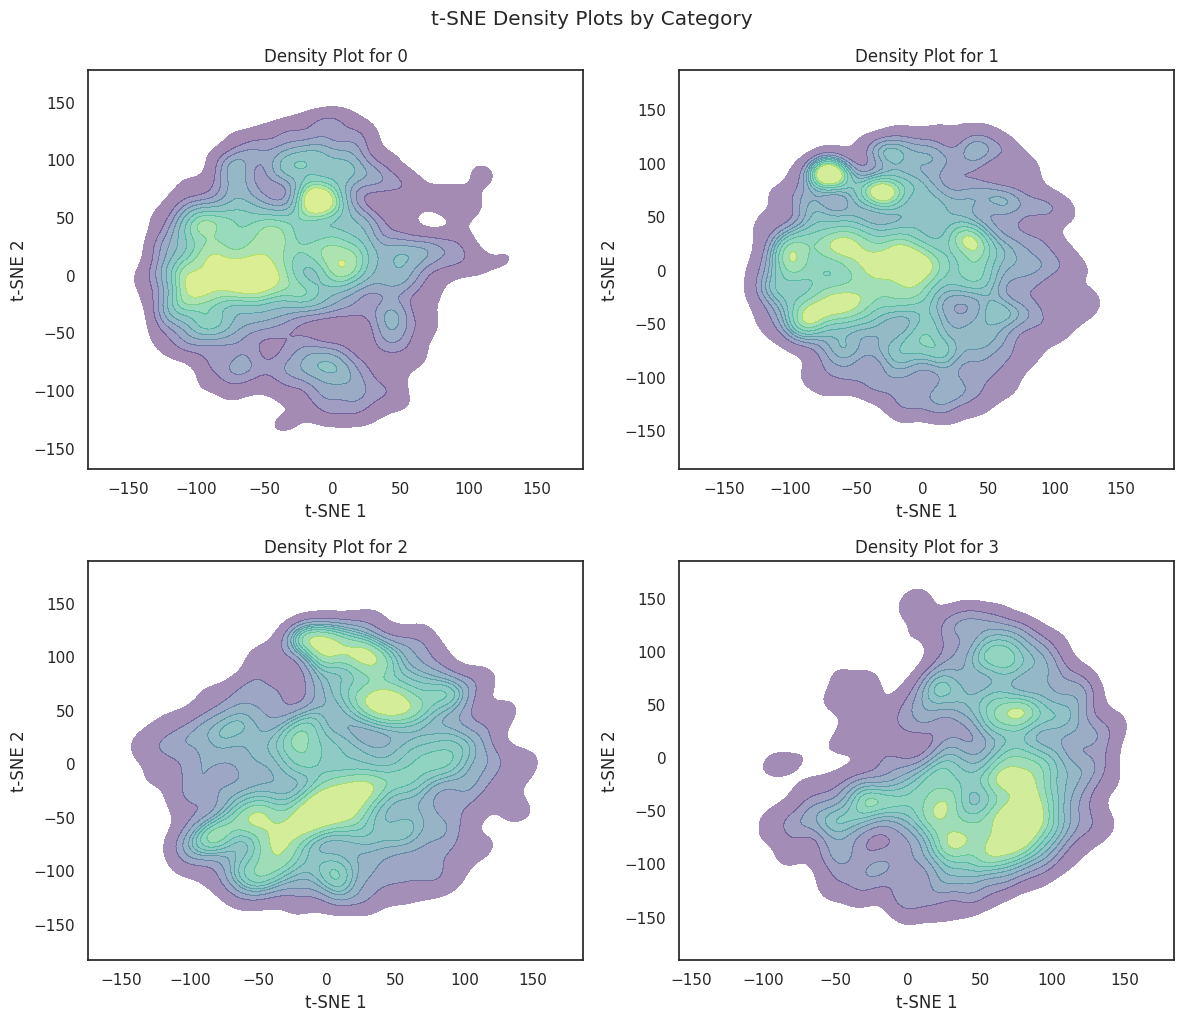

In [39]:
plot_density_by_age(tsne_df, max_categories=4, save_pt=None)

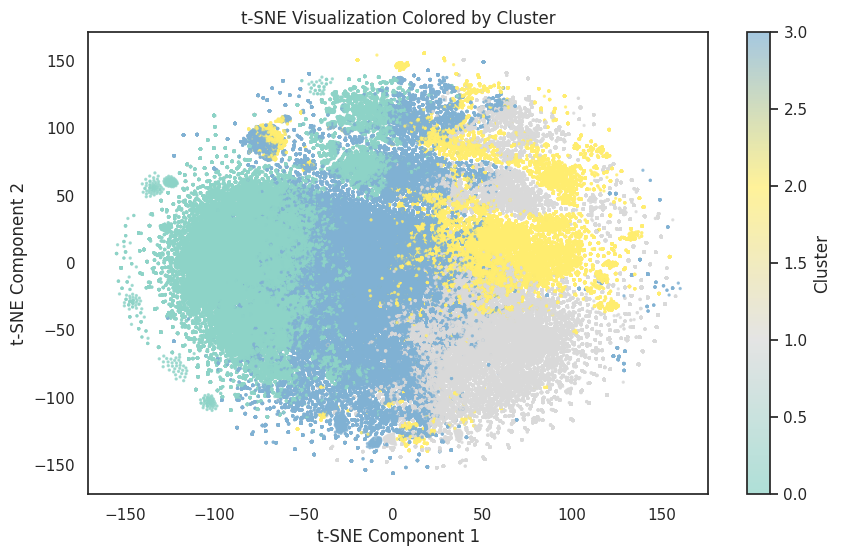

In [40]:
plot_tsne(tsne_df, color='Cluster', point_size=2, save_pt=None)

Data not availabel, open and display the image directly


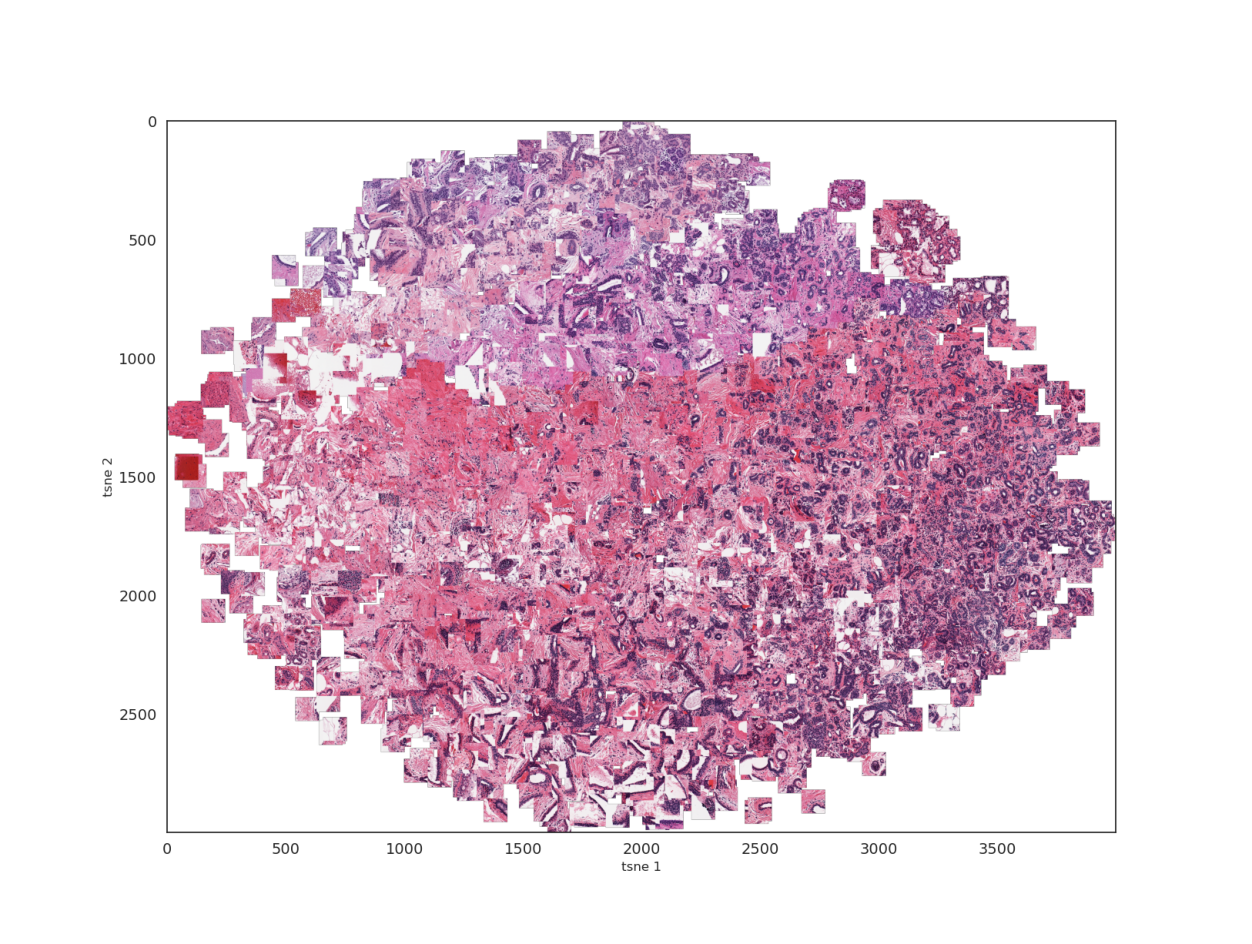

In [54]:
try:
  full_image = paste_HE_on_tsne(fea_df, WSI_folder, max_dim=100, n_samples=1000, image_size=(4000, 3000), random_state=42)

  plt.figure(figsize = (16,12))

  # Calculate and add cluster labels at the centroids
  centroids = tsne_df.groupby('Cluster')[['tsne1', 'tsne2']].mean()
  for cluster, (x, y) in centroids.iterrows():
      plt.text(x, y, str(cluster), fontsize=12, fontweight='bold',
              ha='center', va='center', color='black',
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

  plt.xlabel("tsne 1")
  plt.ylabel("tsne 2")
  plt.imshow(np.flipud(full_image), origin='upper')

except Exception as e:
    print(f"Data not availabel, open and display the image directly")
    img_path = "/content/BreastAgeNet/data/SGK_UNI_BreastAgeNet_tsne_tiles_4clusters.png"
    img = Image.open(img_path)

    # Display the image using matplotlib
    plt.figure(figsize=(16, 12))  # Adjust figure size
    plt.imshow(np.array(img))  # Display the image
    plt.axis('off')  # Hide axis
    plt.show()

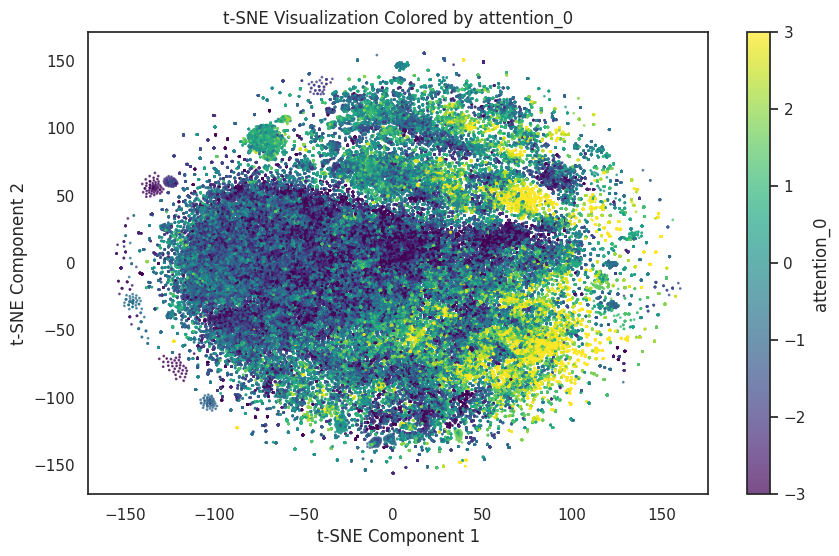

In [41]:
plot_tsne(tsne_df, color='attention_0', point_size=1, vmin=-3, vmax=3, save_pt=None)

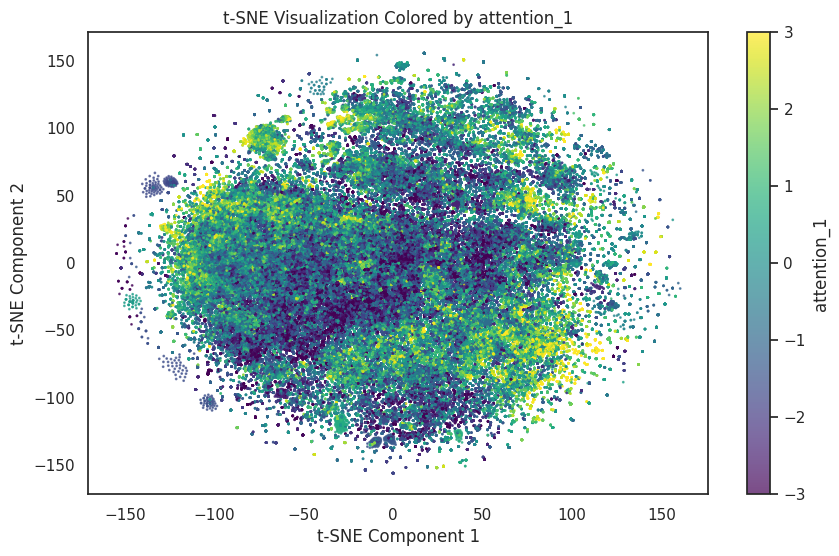

In [42]:
plot_tsne(tsne_df, color='attention_1', point_size=1, vmin=-3, vmax=3, save_pt=None)

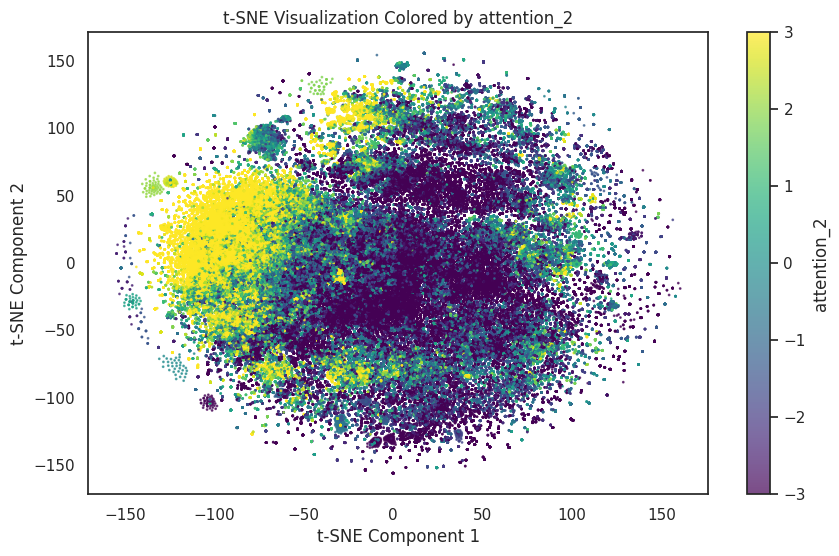

In [43]:
plot_tsne(tsne_df, color='attention_2', point_size=1, vmin=-3, vmax=3, save_pt=None)